### ***Import All Required Libraries***  

In [390]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ***Load Train and Test Data***  

In [353]:
train_df = pd.read_csv('../project_2-master/datasets/train.csv')
test_df = pd.read_csv('../project_2-master/datasets/test.csv')

In [355]:
# Main DF
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### ***Continous Features***  

In [388]:
# All of the continous features in the datasets
continous_columns = ['Id', 'Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 
                             'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
                             'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 
                             'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']

In [389]:
# There are a lot of different features here however they do not all matter.
# We only want features that correlate with 'SalePrice'
train_df[continous_columns].describe()

,Id,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,...,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
count,2051.000000,1721.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,...,2051.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,69.055200,10065.208191,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,...,1499.330083,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,181469.701609
std,843.980841,23.260653,6742.488909,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,...,500.447829,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,79258.659352
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,753.500000,58.000000,7500.000000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,...,1129.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129825.000000
50%,1486.000000,68.000000,9430.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,...,1444.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,162500.000000
75%,2198.000000,80.000000,11513.500000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,...,1728.500000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,2930.000000,313.000000,159000.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,...,5642.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,611657.000000


In [369]:
train_df[continous_columns].shape

(2051, 21)

In [370]:
test_df[continous_columns[:-1]].shape

(878, 20)

### ***Continous Feature Correlation with Sale Price***  

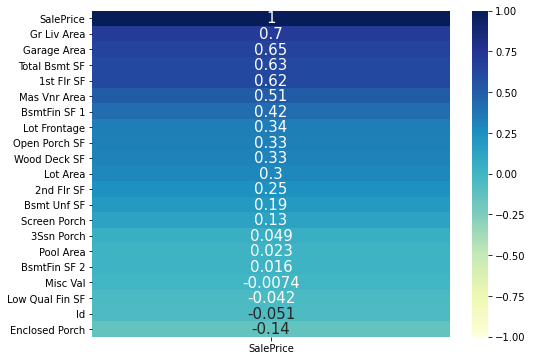

In [372]:
# I only want to use features that have a correlation greater than .60 with 'SalePrice'
# - Gr Liv Area, Garage Area, Total Bsmt SF, and 1st Flr SF
plt.figure(figsize=(8,6))
sns.heatmap(train_df[continous_columns].corr()[['SalePrice']].sort_values(by="SalePrice",
       ascending=False),
           annot=True,
           cmap='YlGnBu',
           annot_kws={'fontsize':15},
           vmin=-1, vmax=1, );

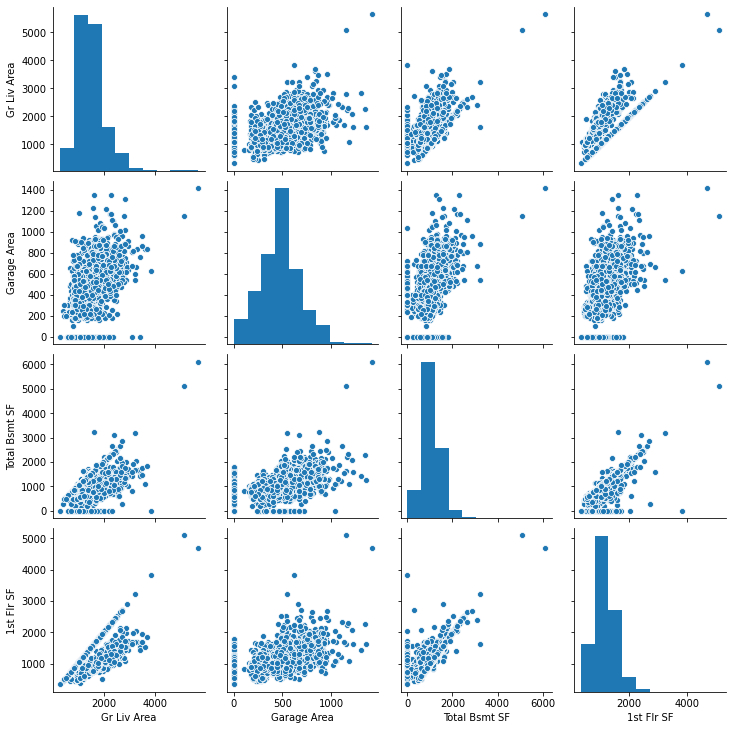

In [387]:
# Check for multicollinearity
sns.pairplot(train_df[['Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF']])

### ***Feature Reasoning***  
- It seems like **'1st Flr SF'** and **'Gr Liv Area'** have a high correlation with each oth
- After taking out 1st Flr SF my model ended up with a worse model score however it reduces the multicollinearity   
- I am keeping that feature in my model since it will be a feature we will look at when we are modeling the potential investment property.
- These are great features for predicting how much a house should be sold for. We can take these features when we are in the process of searching for investment properties.   
- These features we can obtain from real estate agent in that area and then we can plug these into our model to see if that property is a potential buy or not.

In [385]:
def over_fifty(train, test):
    
# ALL OF THE CONTINOUS FEATURES IN THE DATASET
    continous_columns = ['Id', 'Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 
                             'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
                             'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 
                             'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']
    
    train = train[continous_columns]
    test = test[continous_columns[:-1]]
    
# OVER 60% CORRELATION WITH 'SALEPRICE'
    # All of the features over .60 correlation
    corr_over_fifty_cols = train.columns[train.corr()['SalePrice'] > .60] # Credit to Eric Heidbreder
    
    # Training correlation over .50
    final_df_train = train[corr_over_fifty_cols[:-1]]
    final_df_train = final_df_train.join(train['Id'])
    
    # Reorder the columns so 'Id' is first
    cols = list(final_df_train.columns)
    cols = [cols[-1]] + cols[:-1]
    final_df_train = final_df_train[cols]

    # Testing correlation over .50
    final_df_test = test[corr_over_fifty_cols[:-1]]
    final_df_test = final_df_test.join(test['Id'])
    
    # Reorder the columns so 'Id' is first
    cols = list(final_df_test.columns)
    cols = [cols[-1]] + cols[:-1]
    final_df_test = final_df_test[cols]
    
# NAN VALUE REPLACEMENT WITH MEAN
    # Train
    for _ in final_df_train:
        if final_df_train[_].isna().sum() > 0:
            final_df_train[_].fillna(np.mean(final_df_train[_]), inplace = True)

    # Test 
    for j in final_df_test:
        if final_df_test[j].isna().sum() > 0:
            final_df_test[j].fillna(np.mean(final_df_test[j]), inplace = True)
            
# SEND OUT TO CLEANING FUNCTION  
    # Send out the csv to main merging function
    final_df_train.to_csv('../project_2-master/datasets/continous_train.csv', index=False)
    final_df_test.to_csv('../project_2-master/datasets/continous_test.csv', index=False)
    
    return final_df_train

In [386]:
over_fifty(train_df, test_df)

,Id,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area
0,109,725.0,725,1479,475.0
1,544,913.0,913,2122,559.0
2,153,1057.0,1057,1057,246.0
3,318,384.0,744,1444,400.0
4,255,676.0,831,1445,484.0
...,...,...,...,...,...
2046,1587,1884.0,1728,1728,520.0
2047,785,861.0,861,861,539.0
2048,916,896.0,1172,1913,342.0
2049,639,1200.0,1200,1200,294.0
